In [245]:
import healpy as h
from modules.flat_sky_codes import tangent_plane_analysis as tpa
from modules.masking import gen_masks as gm
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


<IPython.core.display.Javascript object>


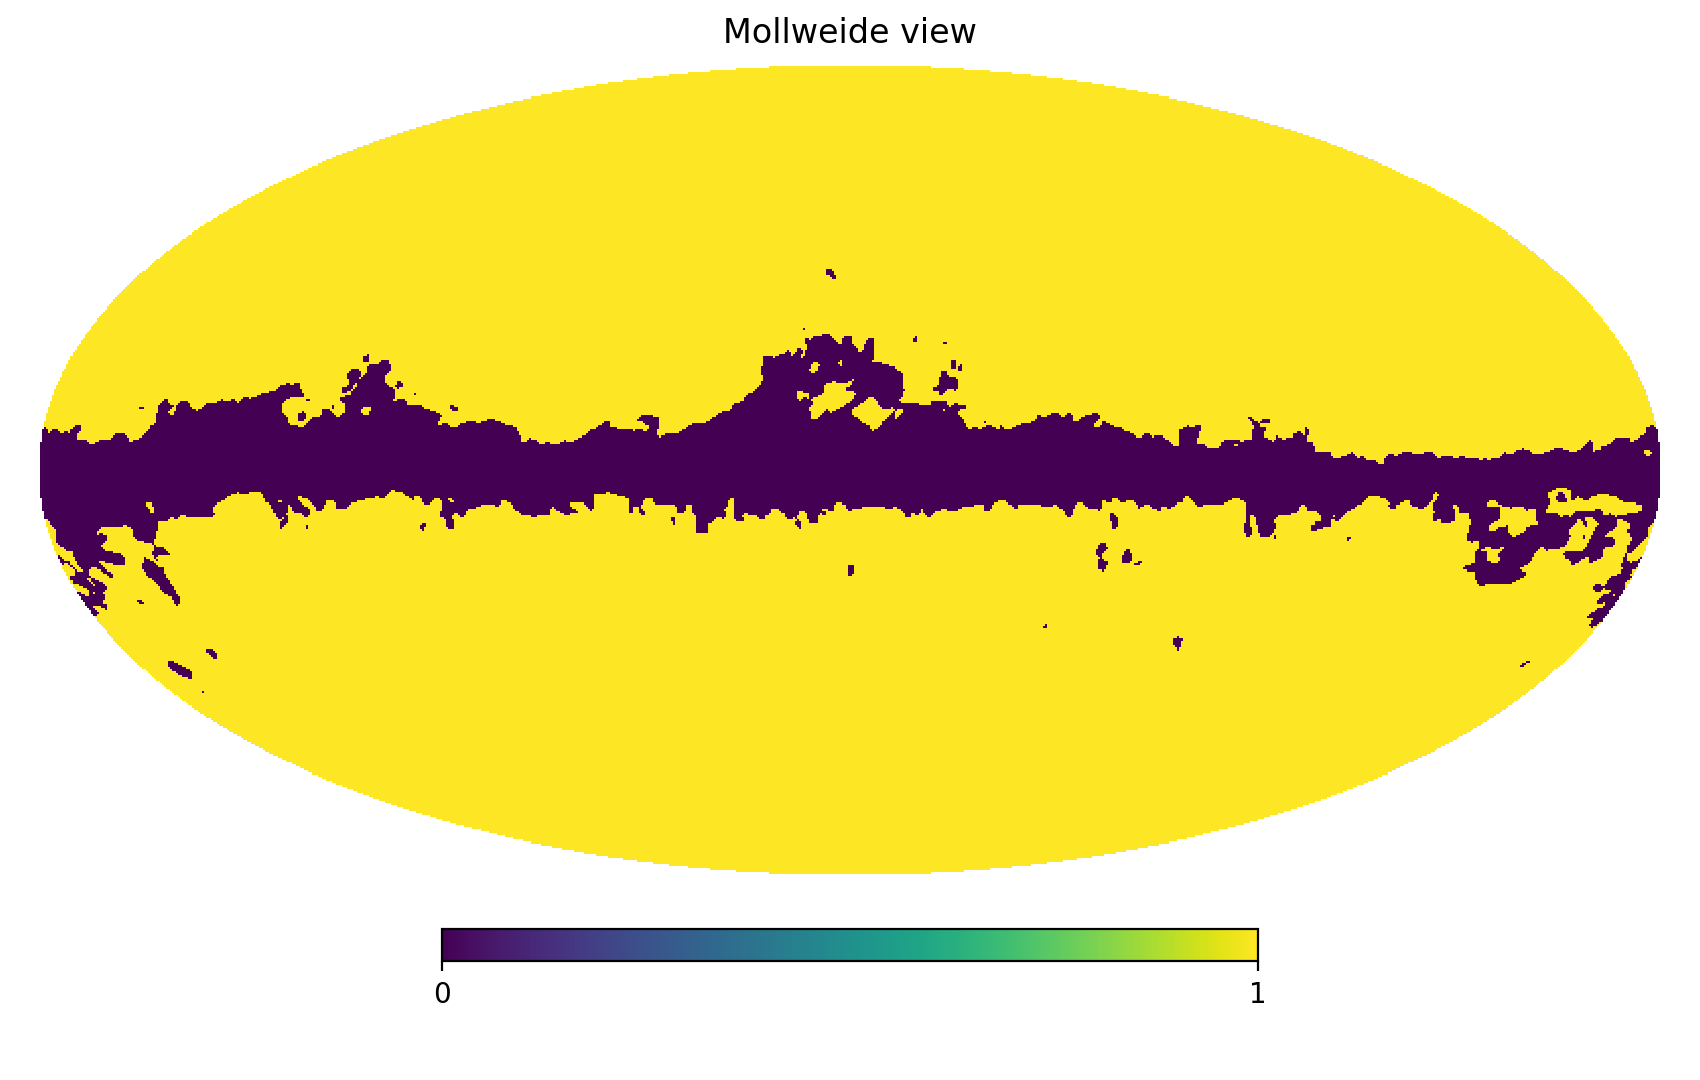

In [190]:
mask=h.read_map("../data/Planck/masks/COM_Mask_PCCS-143-zoneMask_2048_R2.01.fits")
mask=(2-mask)/2.
h.mollview(mask)

# Masking the LMC and SMC

In [214]:
lmc_glon=280.4652
lmc_glat=-32.8884
lmc_pix=h.ang2pix(nside,lmc_glon,lmc_glat,lonlat=True)
lmc_vec=h.pix2vec(nside,lmc_pix)
lmc_pix=h.query_disc(nside,lmc_vec,radius=(2*60./60.)*np.pi/180.)
mask[lmc_pix]=0.

smc_glon=302.8084 
smc_glat=-44.3277
smc_pix=h.ang2pix(nside,smc_glon,smc_glat,lonlat=True)
smc_vec=h.pix2vec(nside,smc_pix)
smc_pix=h.query_disc(nside,smc_vec,radius=(1.5*60./60.)*np.pi/180.)
mask[smc_pix]=0.

<IPython.core.display.Javascript object>


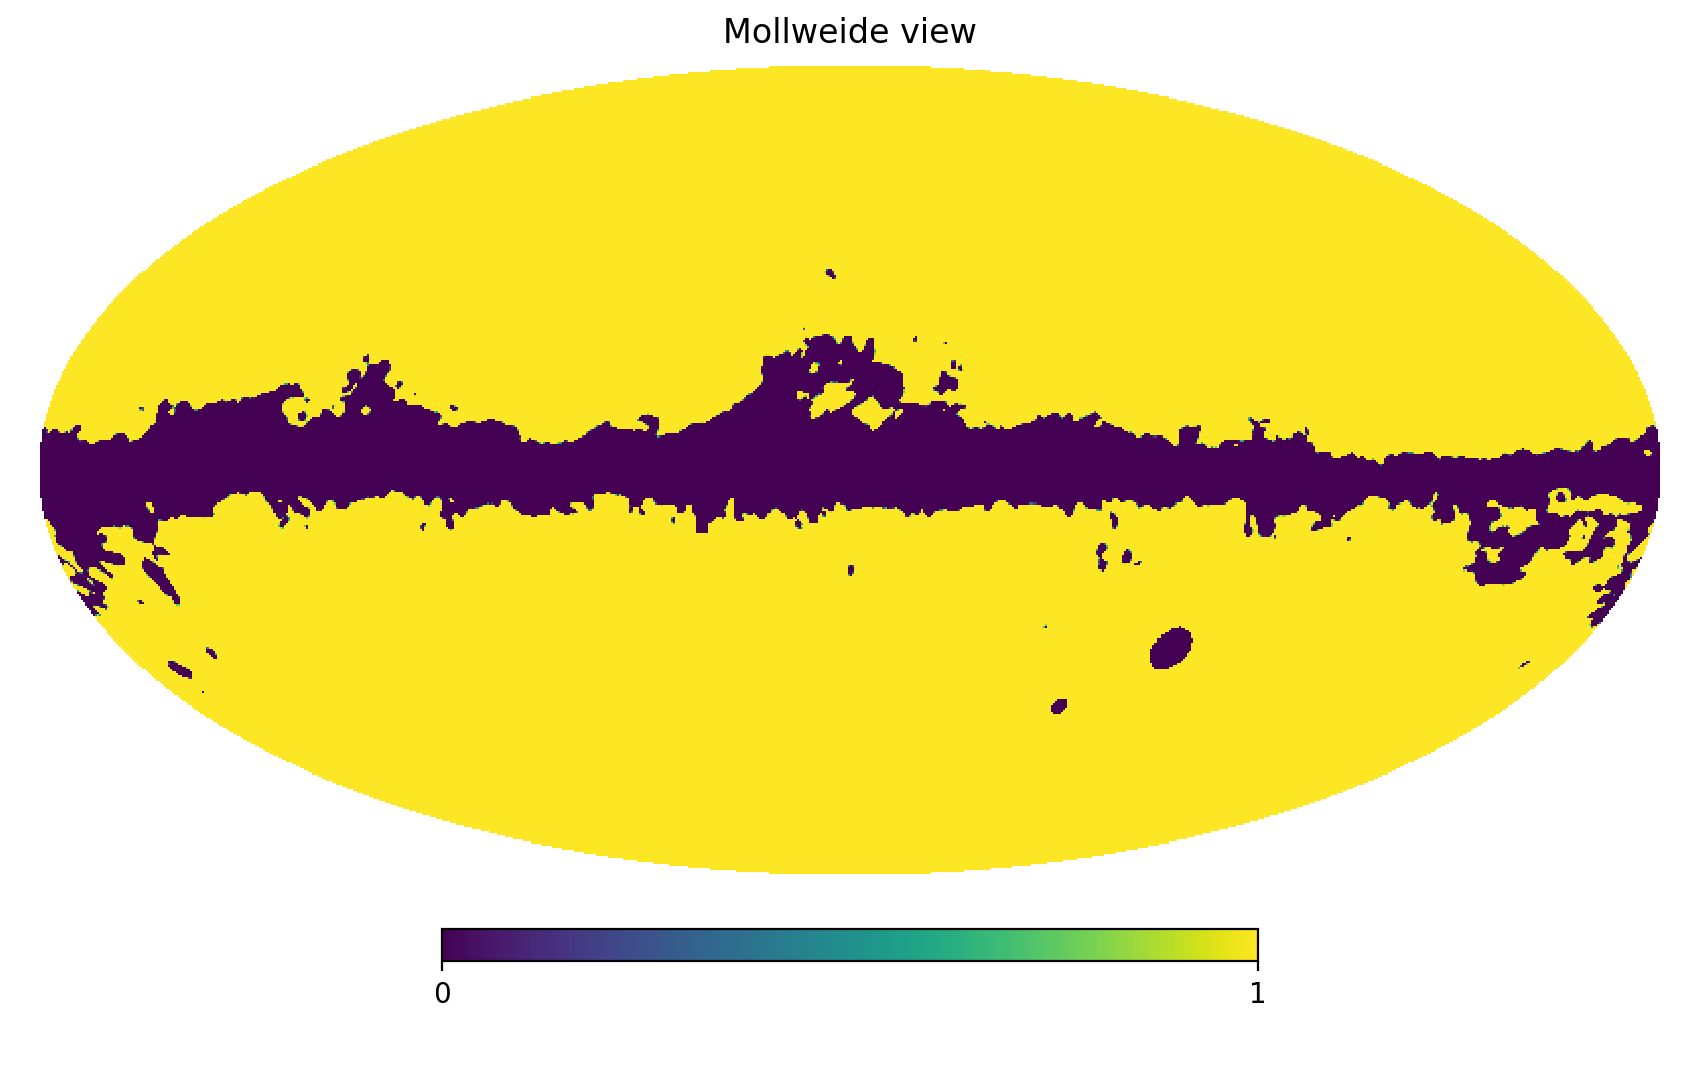

In [215]:
h.mollview(mask)

In [367]:
nside=512
fmap=np.zeros(h.nside2npix(nside),float)
mask=h.ud_grade(mask,nside)

tilenside=8
pixnum=arange(h.nside2npix(tilenside))
fsky=np.zeros(np.size(pixnum),float)
pix_glon,pix_glat=h.pix2ang(tilenside,pixnum,lonlat=True)

xsize=12.
tmap=np.zeros(h.nside2npix(nside),float)
idx=0
projop=tpa.tangent_plane_setup(nside,xsize,pix_glat[idx],pix_glon[idx],rescale=0.2)
timage=projop.get_tangent_plane(tmap)
timage[:,:]=1.
x,y=np.indices((timage.shape))
for idx in pixnum:
    projop=tpa.tangent_plane_setup(nside,xsize,pix_glat[idx],pix_glon[idx],rescale=0.2)
    tmap[:]=0.
    tmask=projop.get_tangent_plane(mask)
    fsky[idx]=np.sum(tmask)/np.size(tmask)

glat_thr=0.
for idx in pixnum[(fsky>0.3) & (abs(pix_glat)>glat_thr)]:
#for idx in pixnum[(fsky>0.3) & (abs(cglat)>glat_thr)]:
    projop=tpa.tangent_plane_setup(nside,xsize,pix_glat[idx],pix_glon[idx],rescale=0.2)
    tmap[:]=0.
    glon,glat=projop.ij2ang(x.ravel(),y.ravel())
    mapixs=h.ang2pix(nside,glon,glat,lonlat=True)
    tmap[mapixs]=1.
    fmap=fmap+tmap

<IPython.core.display.Javascript object>


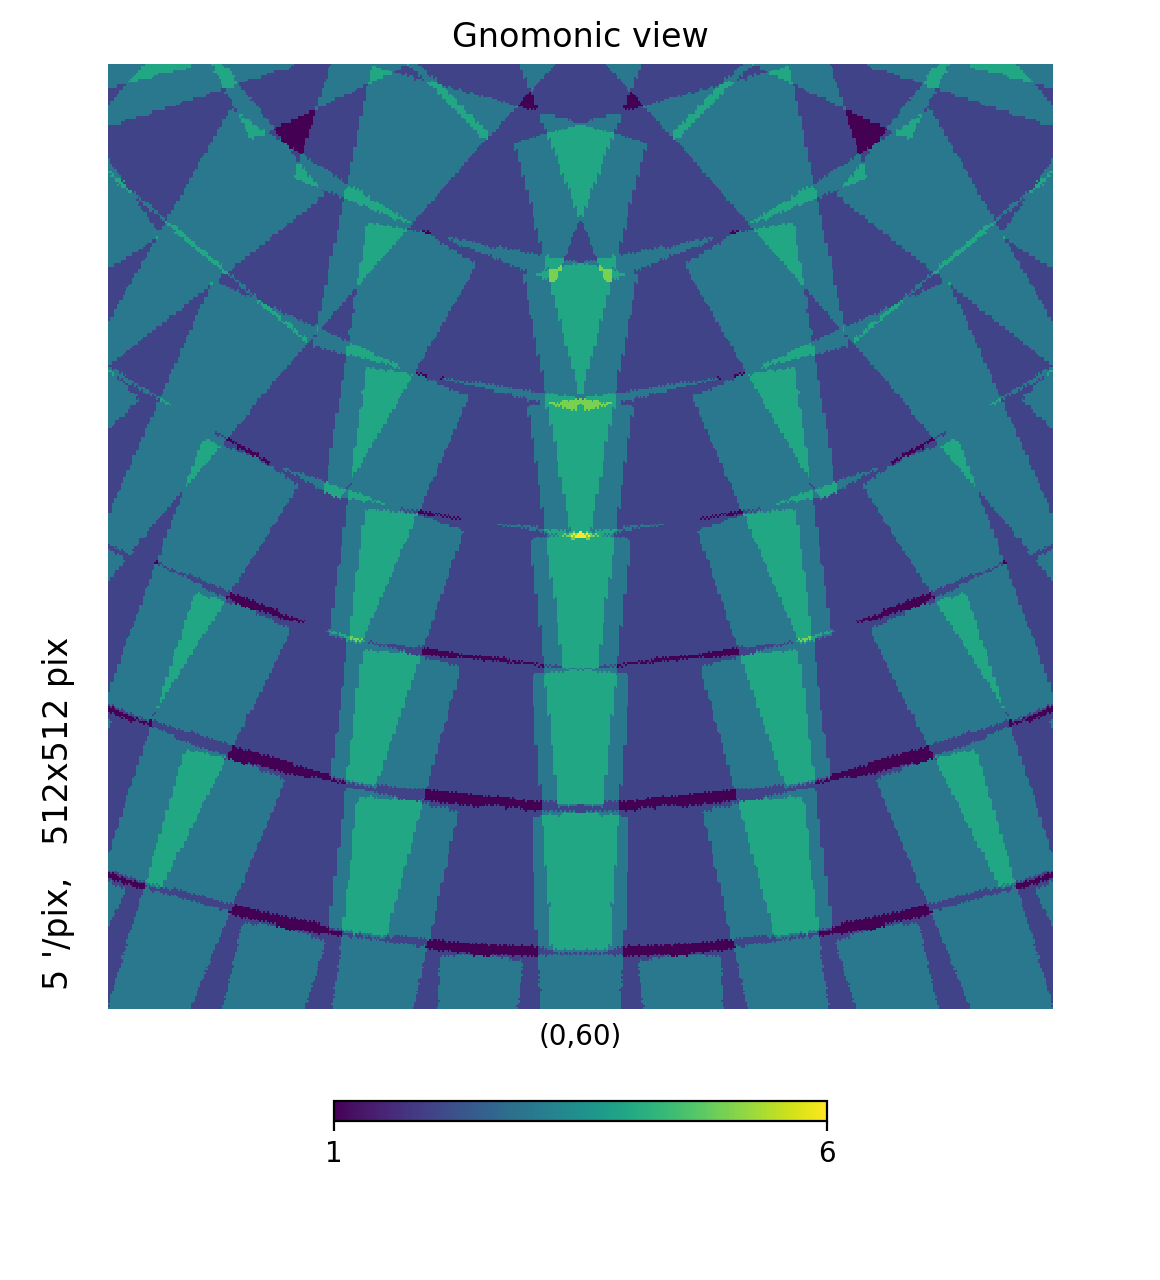

In [368]:
h.gnomview(fmap,xsize=512,reso=5,rot=(0,60))

<IPython.core.display.Javascript object>


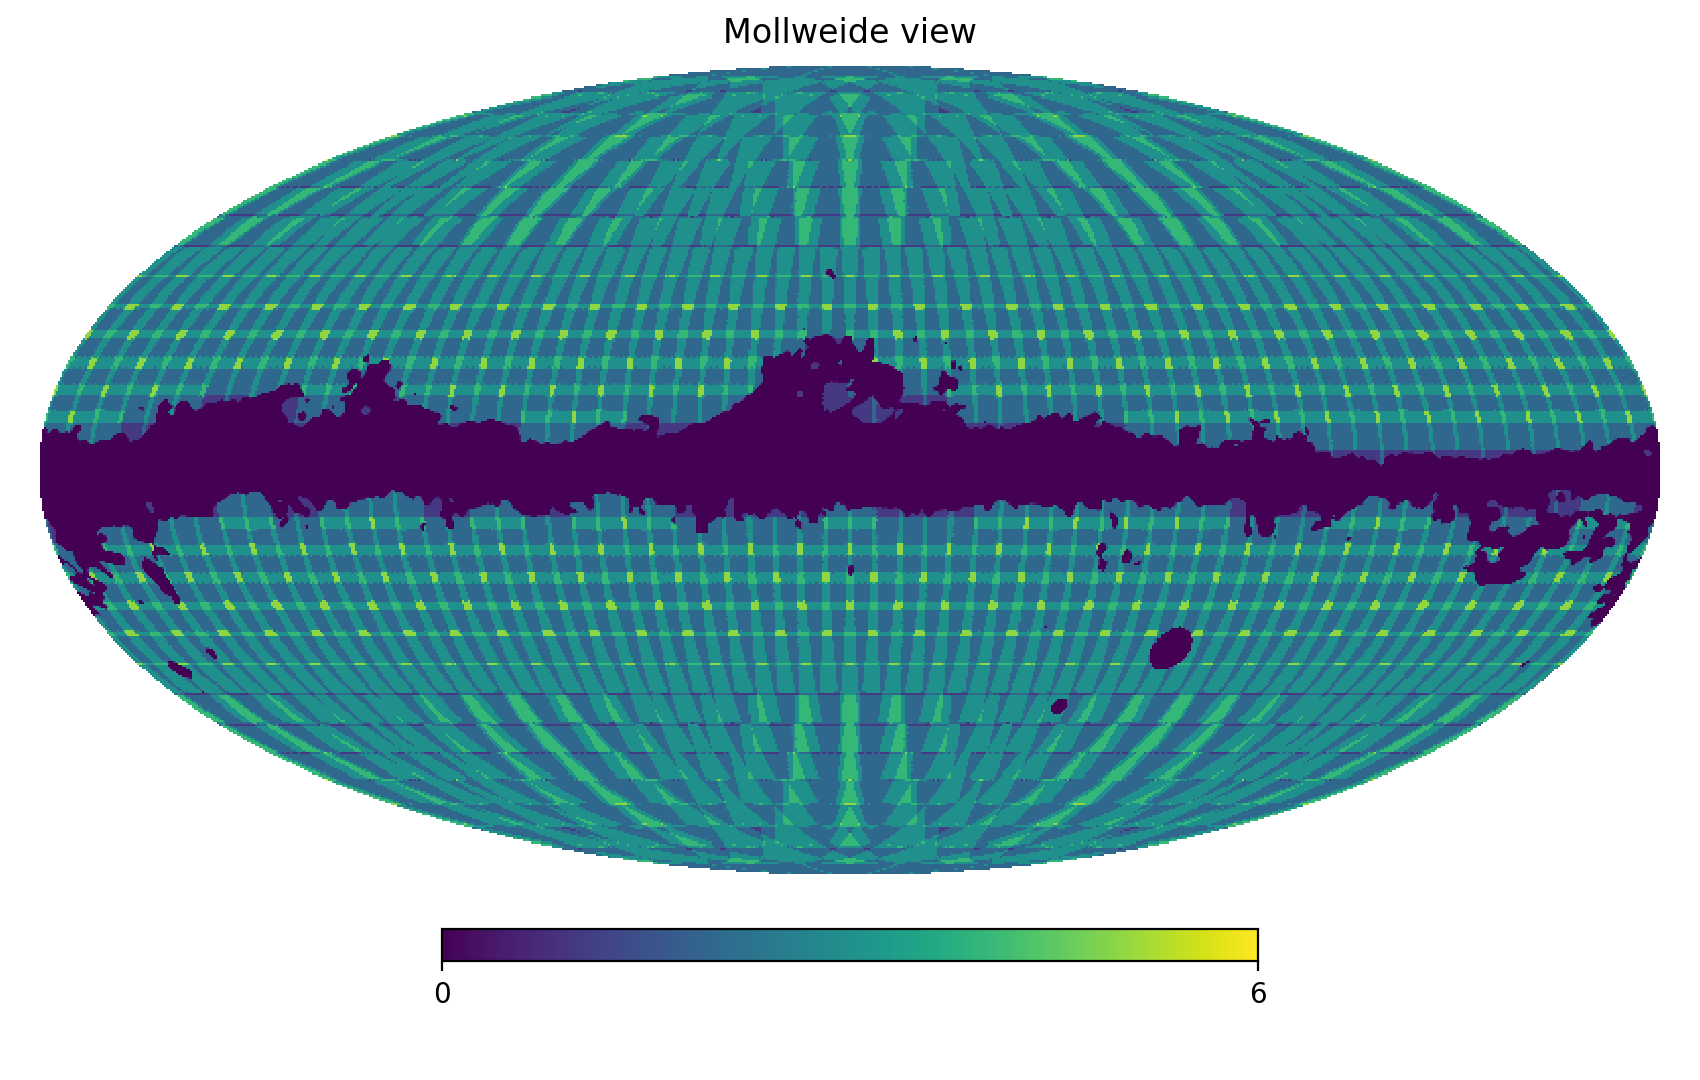

In [369]:
h.mollview(fmap*mask)

In [373]:
np.where(fmap==0)

(array([1072164, 1072165, 1072166, ..., 1802234, 1802235, 1802236]),)

In [371]:
sum(fmap*mask)/sum(mask)

2.6594333439390834

In [359]:
cglat=linspace(-90,90,15)
cglat=linspace(-90,90,15)

In [360]:
idx=200
filename="tile_G" + str(round(pix_glon[idx],2)) + ["", "+"][pix_glat[idx] >= 0] + str(round(pix_glat[idx],2))

In [361]:
filename

'tile_G275.63+30.0'

In [362]:
sign(pix_glat[idx])

1.0

In [363]:
pix_glat[idx]

30.000000000000007